In [119]:
import pandas as pd
import numpy as np
from ggplot import *
import PIL
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

In [73]:
data_url = "../galton-data.csv"
galton_data = pd.read_csv(data_url,encoding = "ISO-8859-1")
#galton_data.head()

data_url = '../AnnualSpending.csv'
spend_data = pd.read_csv(data_url)
#spend_data.head()

data_url = '../data.worldbank.org.csv'
world_bank_data = pd.read_csv(data_url, encoding="ISO-8859-1")
world_bank_data = world_bank_data.replace({"..": np.nan, "?": np.nan})
#world_bank_data.head()

In [74]:
galton_height_gender_cols = galton_data[["height", "gender"]]
galton_height_gender_cols.head()

,height,gender
0,73.2,M
1,69.2,F
2,69.0,F
3,69.0,F
4,73.5,M


In [75]:
world_bank_data.head()
print("Total number of rows which have NAN value: ", world_bank_data.shape[0]-world_bank_data.dropna().shape[0])
world_bank_data = world_bank_data[["Country", "Life.expectancy", "Infant.mortality", "Per.capita.income", "Literacy"]]
world_bank_data = world_bank_data.dropna()
world_bank_country = world_bank_data[["Country"]]
world_bank_data = world_bank_data.reset_index().drop(['index','Country'],axis=1)
world_bank_data.head()
#print(world_bank_data.shape[0])
spend_data.head()

Total number of rows which have NAN value:  172


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,4,13265,1196,4221,6404,507,1788
4,5,22615,5410,7198,3915,1777,5185


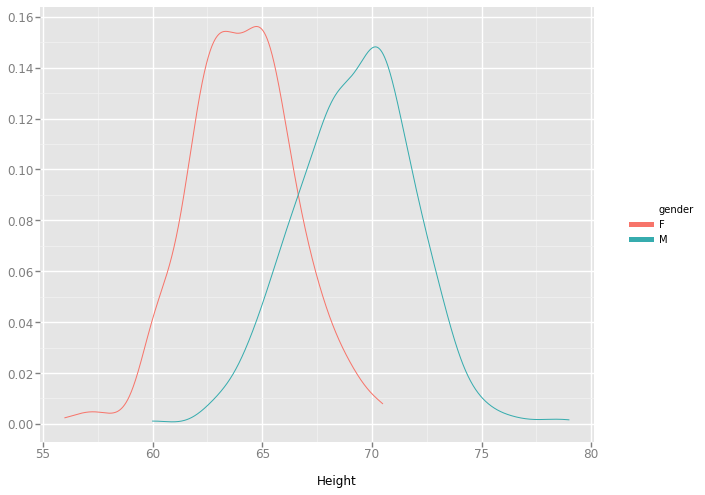

<ggplot: (103807086968)>

Cluster Means:  
 [[69.78419865]
 [63.81692308]] 
 Clustering Vector:  
 [0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1
 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0
 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 1 0 0 0 0 

In [82]:
ggplot(galton_height_gender_cols, aes(x='height', color='gender')) + geom_density(alpha=1) + xlab("Height")
#plt.show()
k = 2
galton_2k_cluster = KMeans(n_clusters=k, random_state=0).fit(galton_height_gender_cols.loc[:, ["height"]])
cluster_label = galton_2k_cluster.predict(galton_height_gender_cols.loc[:, ["height"]])
label = galton_2k_cluster.labels_
centers = galton_2k_cluster.cluster_centers_
print("Cluster Means: ", "\n", centers, "\n", "Clustering Vector: ", "\n", label)

label     0    1
gender          
F        57  376
M       386   79


C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


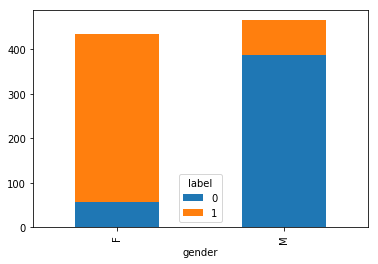

In [91]:
#cm = confusion_matrix(galton_height_gender_cols["gender"],label)
#cm = pd.Series(label)
#cm = cm.value_counts()

galton_height_gender_cols['label'] = label
cm_temp = pd.crosstab(galton_height_gender_cols['gender'], galton_height_gender_cols['label'])
print(cm_temp)
cm_temp.plot(kind='bar', stacked=True)
plt.show()

# code after this is redundant and plot the same thing again so thats why it is not coded here.

In [99]:
world_bank_data.head()
k = 2
world_bank_2k_cluster = KMeans(n_clusters=k).fit(world_bank_data)
k2_mean = world_bank_2k_cluster.cluster_centers_
k2_label = world_bank_2k_cluster.labels_
k = 3
world_bank_3k_cluster = KMeans(n_clusters=k).fit(world_bank_data)
k3_mean = world_bank_3k_cluster.cluster_centers_
k3_label = world_bank_3k_cluster.labels_
np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
print("2k cluster: \n", k2_mean)
print("3k cluster: \n", k3_mean)

,Life.expectancy,Infant.mortality,Per.capita.income,Literacy
0,52.26687805,96,4102.11859,70.77841
1,75.93763415,5.8,14128.87855,98.95
2,70.76321951,27.9,5496.34464,99.78936
3,71.62590244,30.7,1211.701531,59.72154
4,76.4332439,5.1,4197.807304,98.26413


2k cluster: 
 [[   70.9231    25.0814  8161.6712    87.8985]
 [   80.6216     4.45   63777.9709    97.009 ]]
3k cluster: 
 [[   77.7622     7.1778 21560.0564    97.8355]
 [   69.1127    29.8206  4615.0398    85.2681]
 [   80.6216     4.45   63777.9709    97.009 ]]


[8807652495, 2896254455.0, 852926402.0, 520612329.0, 283461815.0, 162244518.0, 79195673.0, 46780225.0, 35013446.0, 26505142.0]


Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'sum of squares')

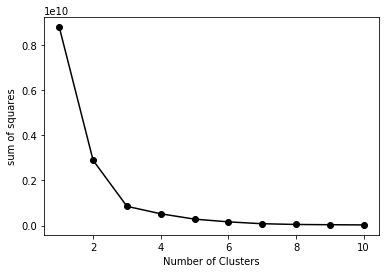

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'sum of squares')

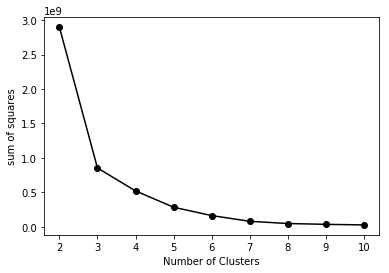

In [101]:
world_bank_data = world_bank_data.apply(pd.to_numeric)
sos=[]
sos.append(round((world_bank_data.shape[0]-1) * sum(world_bank_data.var())))

for i in range(2, 11):
    model = KMeans(n_clusters=i).fit(world_bank_data)
    sos.append(round(model.inertia_))
print(sos)

plt.plot(range(1, 11), sos, '-ok')
plt.xlabel("Number of Clusters")
plt.ylabel("sum of squares")
plt.show()

plt.plot(range(2, 11), sos[1:], '-ok')
plt.xlabel("Number of Clusters")
plt.ylabel("sum of squares")
plt.show()

#Note: FITKmeans algo is missing here since there is no package which implements the FITKmeans algo in the python


In [103]:
world_bank_data.head()
k = 6
world_bank_6k_cluster = KMeans(n_clusters=k).fit(world_bank_data)
print("6k cluster labels: \n", world_bank_6k_cluster.labels_)
world_bank_6k_cluster_33 = KMeans(n_clusters=k, random_state= 33).fit(world_bank_data)
print("Total country: ", len(world_bank_country))
world_bank_country['label'] =world_bank_6k_cluster_33.labels_
print("6k cluster labels: \n", world_bank_6k_cluster_33.labels_)

cm_temp = pd.crosstab(world_bank_country['Country'], world_bank_country['label'])
print(cm_temp)


,Life.expectancy,Infant.mortality,Per.capita.income,Literacy
0,52.266878,96.0,4102.118590,70.77841
1,75.937634,5.8,14128.878550,98.95000
2,70.763220,27.9,5496.344640,99.78936
3,71.625902,30.7,1211.701531,59.72154
4,76.433244,5.1,4197.807304,98.26413


6k cluster labels: 
 [3 0 3 3 3 1 1 3 1 1 3 3 1 3 0 3 3 3 1 3 5 3 5 3 3 1 3 3 1 2 0 3 3 4 0 5 3
 3 0 1 1 3 0 3 3]
Total country:  45
6k cluster labels: 
 [1 4 1 1 1 1 4 1 1 1 1 1 4 1 3 1 1 1 4 1 0 1 0 1 1 4 1 1 4 2 3 1 1 5 3 0 1
 1 3 4 1 1 3 1 1]
label                   0  1  2  3  4  5
Country                                 
Angola                  0  1  0  0  0  0
Antigua and Barbuda     0  0  0  0  1  0
Azerbaijan              0  1  0  0  0  0
Bangladesh              0  1  0  0  0  0
Bosnia and Herzegovina  0  1  0  0  0  0
Botswana                0  1  0  0  0  0
Brazil                  0  0  0  0  1  0
Chad                    0  1  0  0  0  0
Dominican Republic      0  1  0  0  0  0
Ecuador                 0  1  0  0  0  0
Egypt, Arab Rep.        0  1  0  0  0  0
El Salvador             0  1  0  0  0  0
Equatorial Guinea       0  0  0  0  1  0
Georgia                 0  1  0  0  0  0
Greece                  0  0  0  1  0  0
Guatemala               0  1  0  0  0  0
Guinea-Bissau  

In [106]:
clust_size = pd.Series(world_bank_6k_cluster.labels_).value_counts()
clust_size = pd.DataFrame(clust_size).reset_index(inplace=False)
clust_size.columns = ['Cluster', 'Count']
print(clust_size.head())

print("6k cluster center:\n",world_bank_6k_cluster.cluster_centers_)
print("columns:", world_bank_data.columns)

world_bank_data_aggregate = world_bank_data
world_bank_data_aggregate['label'] = world_bank_6k_cluster.labels_
pci = world_bank_data_aggregate[['Per.capita.income', 'label']].groupby('label').mean()
print(pci)
l = world_bank_data_aggregate[['Literacy', 'label']].groupby('label').mean()
print(l)
im = world_bank_data_aggregate[['Infant.mortality', 'label']].groupby('label').mean()
print(im)
ie = world_bank_data_aggregate[['Life.expectancy', 'label']].groupby('label').mean()
print(ie)

cm_3 = pd.crosstab(world_bank_data_aggregate['Per.capita.income'], world_bank_data_aggregate['label'])
print(cm_3)

   Cluster  Count
0        3     24
1        1     10
2        0      6
3        5      3
4        4      1
[[   76.5844     8.4833 18229.5387    97.964 ]
 [   71.6461    23.81    8848.2466    94.5413]
 [   78.5968     6.8    74667.1971    97.4779]
 [   68.0571    32.325   2851.2036    81.4043]
 [   82.6463     2.1    52888.7447    96.5401]
 [   80.1178     4.5667 28221.0918    97.5785]]
Index(['Life.expectancy', 'Infant.mortality', 'Per.capita.income', 'Literacy',
       'label'],
      dtype='object')
       Per.capita.income
label                   
0           18229.538742
1            8848.246564
2           74667.197070
3            2851.203649
4           52888.744670
5           28221.091830
        Literacy
label           
0      97.964038
1      94.541348
2      97.477850
3      81.404302
4      96.540150
5      97.578487
       Infant.mortality
label                  
0              8.483333
1             23.810000
2              6.800000
3             32.325000
4          

[3 0 3 3 3 1 1 3 1 1 3 3 1 3 0 3 3 3 1 3 5 3 5 3 3 1 3 3 1 2 0 3 3 4 0 5 3
 3 0 1 1 3 0 3 3]


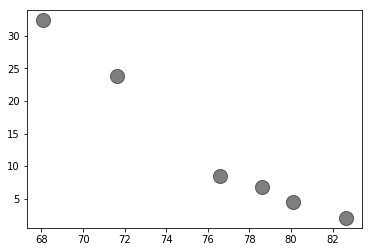

Text(0.5, 0, 'Per.Capita.income')

Text(0, 0.5, 'Literacy')

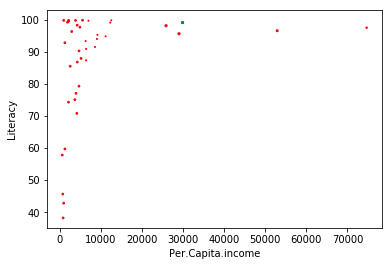

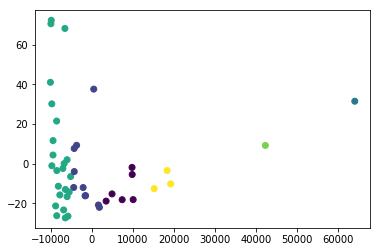

In [114]:
print(world_bank_6k_cluster.labels_)
#sns.pairplot(world_bank_data_aggregate)
centers = world_bank_6k_cluster.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

plt.scatter(world_bank_data_aggregate['Per.capita.income'], world_bank_data_aggregate['Literacy'], s=world_bank_6k_cluster.labels_, edgecolors='red')
plt.xlabel('Per.Capita.income')
plt.ylabel('Literacy')
plt.show()

pca_temp = PCA(2)
plot_colms = pca_temp.fit_transform(world_bank_data)
plt.scatter(x=plot_colms[:, 0], y=plot_colms[:, 1], c=world_bank_data['label'])
plt.show()

In [115]:
k = 4
#world_bank_data.head()
world_bank_4k_cluster = kmedoids.kmedoids(world_bank_data, k)
# K-medoids clustering in R is available but it not available in python

NameError: name 'kmedoids' is not defined

In [ ]:
# gap statistic is not available in the python with any package 

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,4,13265,1196,4221,6404,507,1788
4,5,22615,5410,7198,3915,1777,5185


<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 5011.64194650815, 5011.64194650815, 0.0],
  [0.0, 6000.492979747581, 6000.492979747581, 0.0],
  [0.0, 6646.925981233731, 6646.925981233731, 6000.492979747581],
  [0.0, 5273.7004086314955, 5273.7004086314955, 0.0],
  [0.0, 5413.500992888059, 5413.500992888059, 5273.7004086314955],
  [0.0, 5698.52682717209, 5698.52682717209, 5413.500992888059],
  [0.0, 5219.940133756325, 5219.940133756325, 0.0],
  [0.0, 6617.339722275107, 6617.339722275107, 5219.940133756325],
  [0.0, 3633.566842649245, 3633.566842649245, 0.0],
  [0.0, 5308.553381101107, 5308.553381101107, 3633.566842649245],
  [0.0, 4412.7212692396515, 4412.7212692396515, 0.

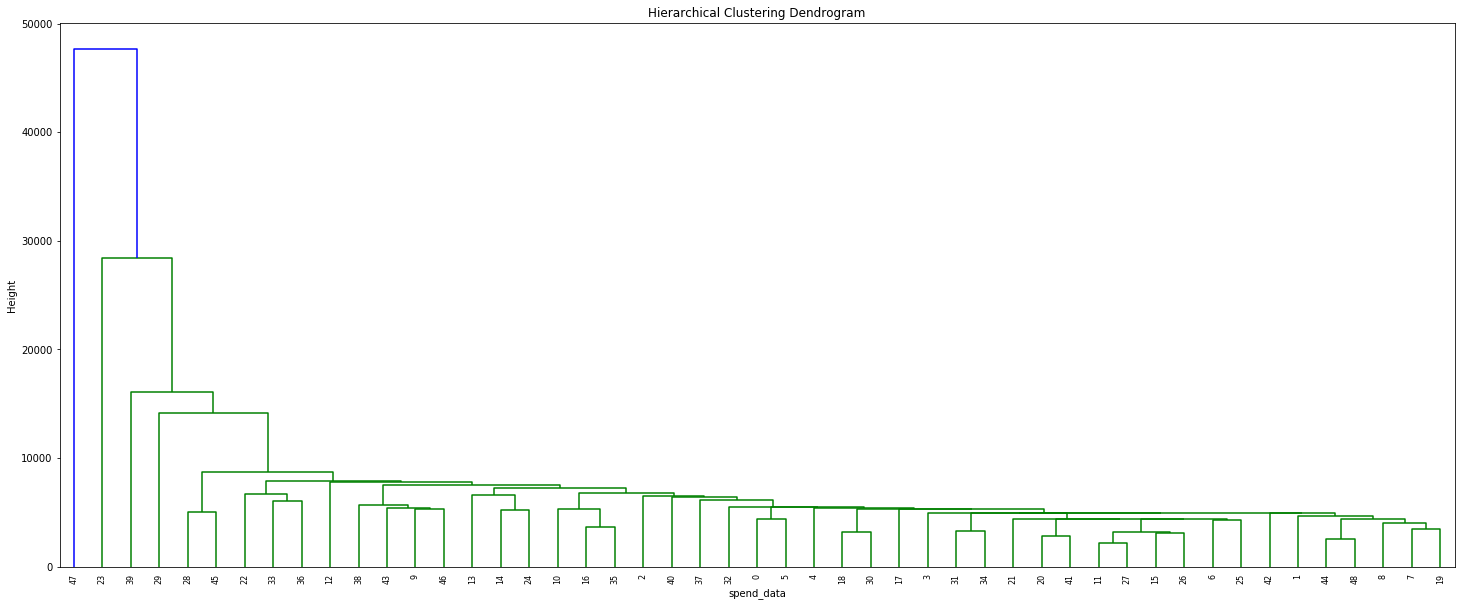

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 5011.64194650815, 5011.64194650815, 0.0],
  [0.0, 6000.492979747581, 6000.492979747581, 0.0],
  [0.0, 6646.925981233731, 6646.925981233731, 6000.492979747581],
  [0.0, 5273.7004086314955, 5273.7004086314955, 0.0],
  [0.0, 5413.500992888059, 5413.500992888059, 5273.7004086314955],
  [0.0, 5698.52682717209, 5698.52682717209, 5413.500992888059],
  [0.0, 5219.940133756325, 5219.940133756325, 0.0],
  [0.0, 6617.339722275107, 6617.339722275107, 5219.940133756325],
  [0.0, 3633.566842649245, 3633.566842649245, 0.0],
  [0.0, 5308.553381101107, 5308.553381101107, 3633.566842649245],
  [0.0, 4412.7212692396515, 4412.7212692396515, 0.

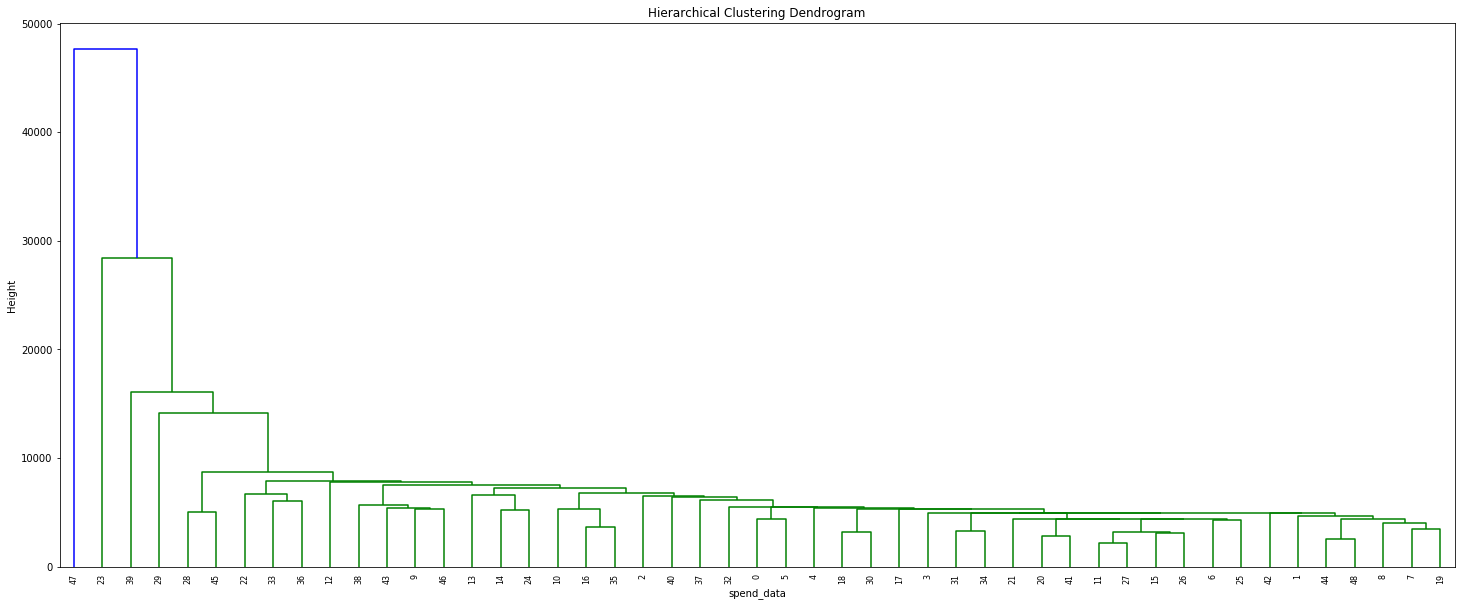

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 16087.538438182517, 16087.538438182517, 0.0],
  [0.0, 6424.519515107725, 6424.519515107725, 0.0],
  [0.0, 6000.492979747581, 6000.492979747581, 0.0],
  [0.0, 8366.756181460052, 8366.756181460052, 6000.492979747581],
  [6424.519515107725,
   11221.577473777917,
   11221.577473777917,
   8366.756181460052],
  [0.0, 5219.940133756325, 5219.940133756325, 0.0],
  [0.0, 6925.730719570319, 6925.730719570319, 5219.940133756325],
  [0.0, 13387.58144699781, 13387.58144699781, 6925.730719570319],
  [11221.577473777917,
   17395.846659475934,
   17395.846659475934,
   13387.58144699781],
  [0.0, 3284.4463764841707, 3284.4463764841707, 

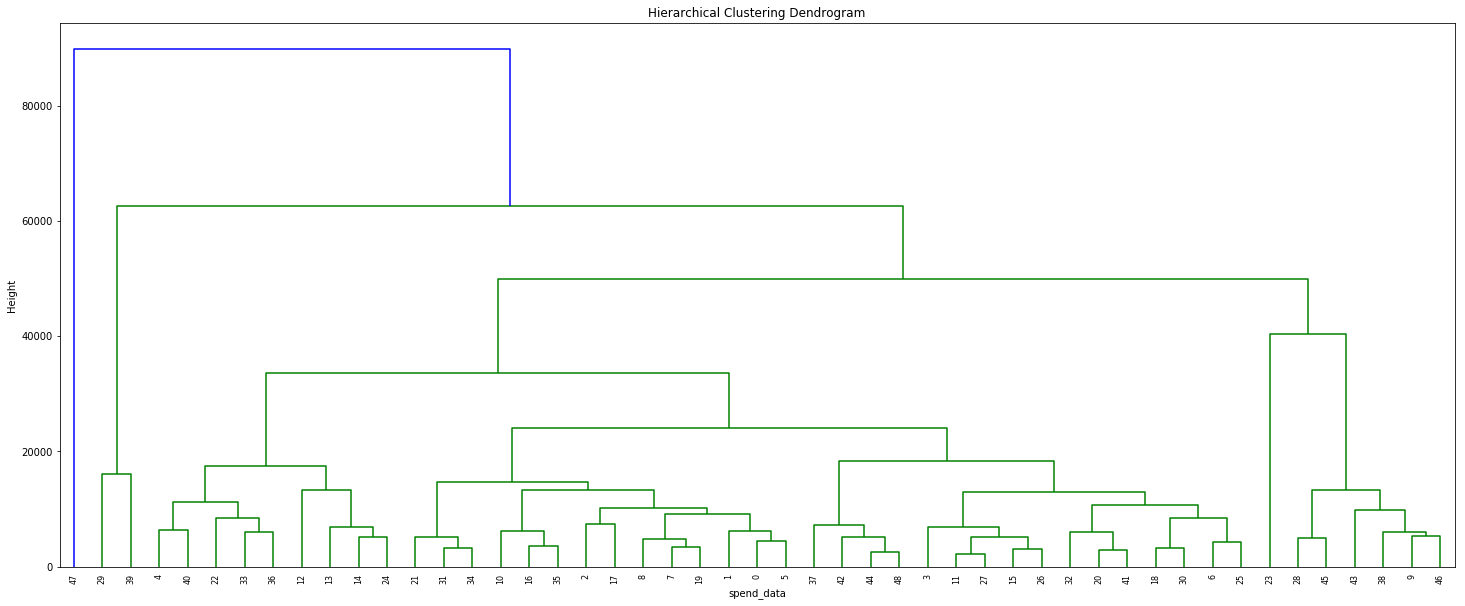

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 16087.538438182517, 16087.538438182517, 0.0],
  [0.0, 5011.64194650815, 5011.64194650815, 0.0],
  [0.0, 5273.7004086314955, 5273.7004086314955, 0.0],
  [0.0, 5858.781896666022, 5858.781896666022, 5273.7004086314955],
  [0.0, 7759.376953725674, 7759.376953725674, 5858.781896666022],
  [5011.64194650815,
   10932.323484492004,
   10932.323484492004,
   7759.376953725674],
  [0.0, 4338.432551048823, 4338.432551048823, 0.0],
  [0.0, 2154.285960591119, 2154.285960591119, 0.0],
  [0.0, 3058.4630126911784, 3058.4630126911784, 0.0],
  [2154.285960591119,
   4146.924597542616,
   4146.924597542616,
   3058.4630126911784],
  [0.0, 58

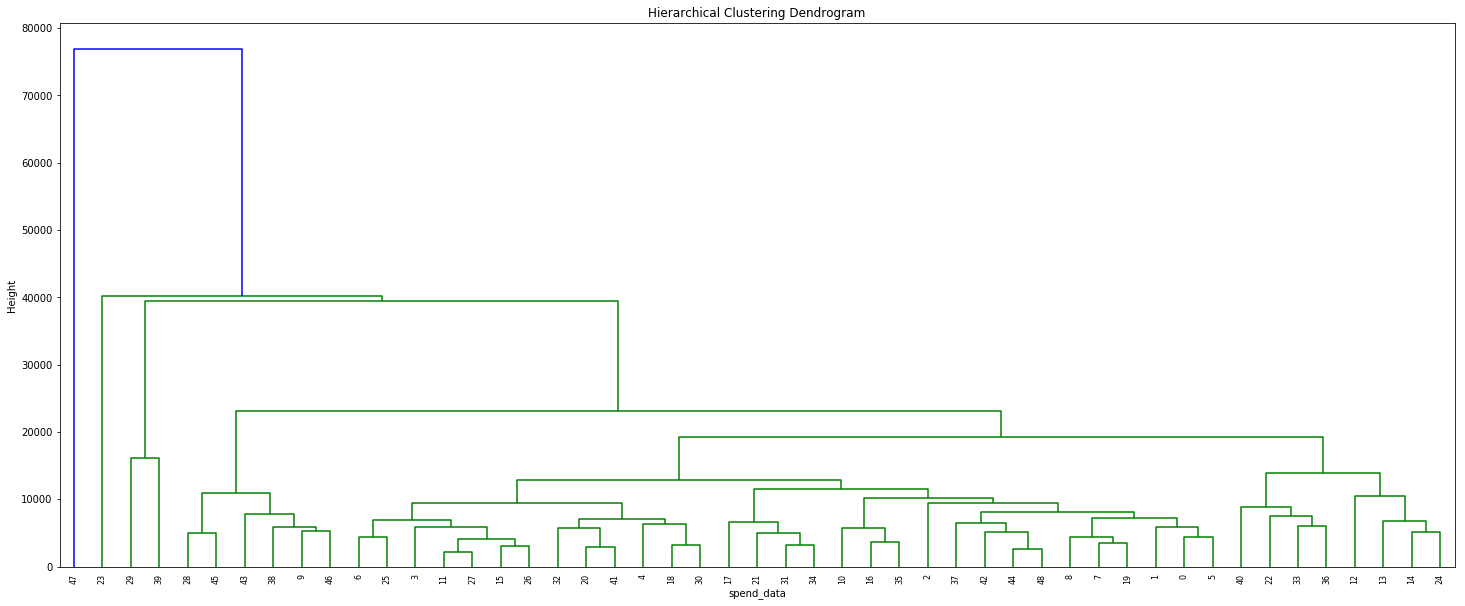

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 16087.538438182517, 16087.538438182517, 0.0],
  [0.0, 5011.64194650815, 5011.64194650815, 0.0],
  [0.0, 5273.7004086314955, 5273.7004086314955, 0.0],
  [0.0, 5234.312562314177, 5234.312562314177, 5273.7004086314955],
  [0.0, 7268.722331560984, 7268.722331560984, 5234.312562314177],
  [5011.64194650815, 9889.575088824595, 9889.575088824595, 7268.722331560984],
  [0.0, 2154.285960591119, 2154.285960591119, 0.0],
  [0.0, 3058.4630126911784, 3058.4630126911784, 0.0],
  [2154.285960591119,
   3766.1966225888955,
   3766.1966225888955,
   3058.4630126911784],
  [0.0, 5409.305061650711, 5409.305061650711, 3766.1966225888955],
  [0

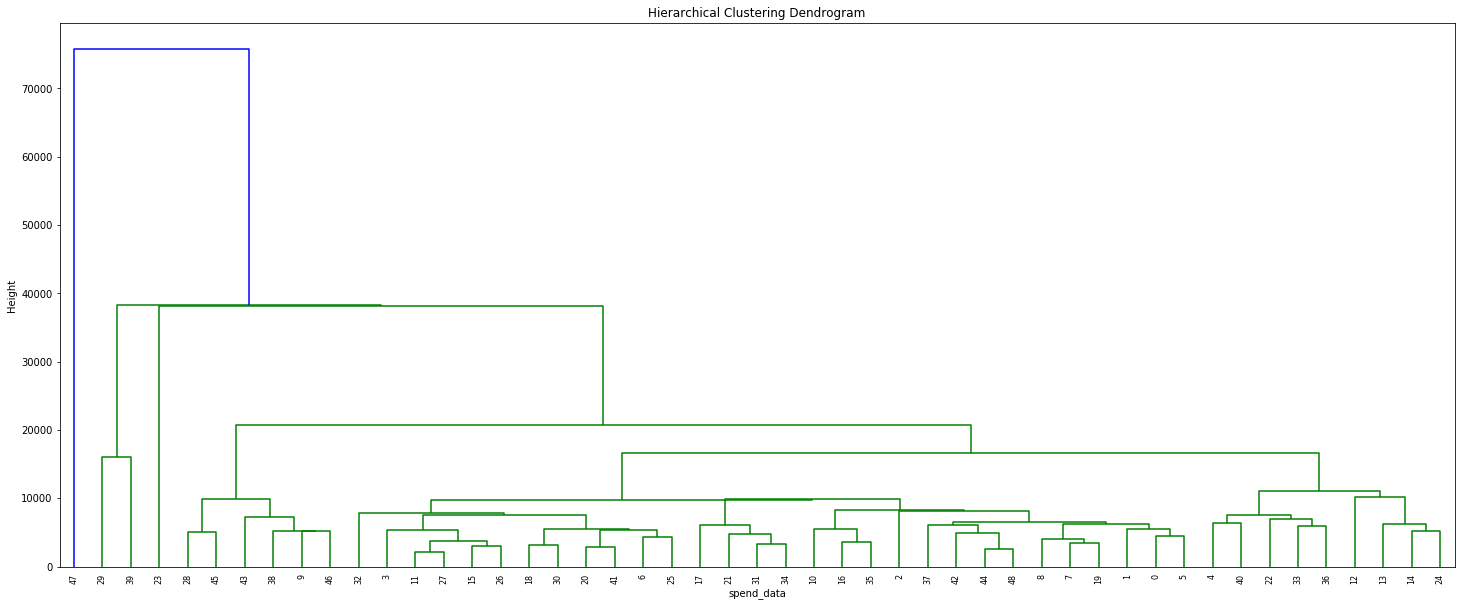

In [116]:
spend_data.head()
spend_h_cluster = linkage(spend_data)
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(spend_h_cluster, leaf_rotation=90., leaf_font_size=8.)
plt.show()

spend_h_cluster_si = linkage(spend_data,method='single')
spend_h_cluster_co = linkage(spend_data,method='complete')
spend_h_cluster_av = linkage(spend_data,method='average')
spend_h_cluster_ce = linkage(spend_data,method='centroid')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(spend_h_cluster_si, leaf_rotation=90., leaf_font_size=8.)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(spend_h_cluster_co, leaf_rotation=90., leaf_font_size=8.)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(spend_h_cluster_av, leaf_rotation=90., leaf_font_size=8.)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(spend_h_cluster_ce, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [ ]:
#shows rectangle for each cluster in the dedrogram which is not possible in python

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 16087.538438182517, 16087.538438182517, 0.0],
  [0.0, 5011.64194650815, 5011.64194650815, 0.0],
  [0.0, 5273.7004086314955, 5273.7004086314955, 0.0],
  [0.0, 5858.781896666022, 5858.781896666022, 5273.7004086314955],
  [0.0, 7759.376953725674, 7759.376953725674, 5858.781896666022],
  [5011.64194650815,
   10932.323484492004,
   10932.323484492004,
   7759.376953725674],
  [0.0, 4338.432551048823, 4338.432551048823, 0.0],
  [0.0, 2154.285960591119, 2154.285960591119, 0.0],
  [0.0, 3058.4630126911784, 3058.4630126911784, 0.0],
  [2154.285960591119,
   4146.924597542616,
   4146.924597542616,
   3058.4630126911784],
  [0.0, 58

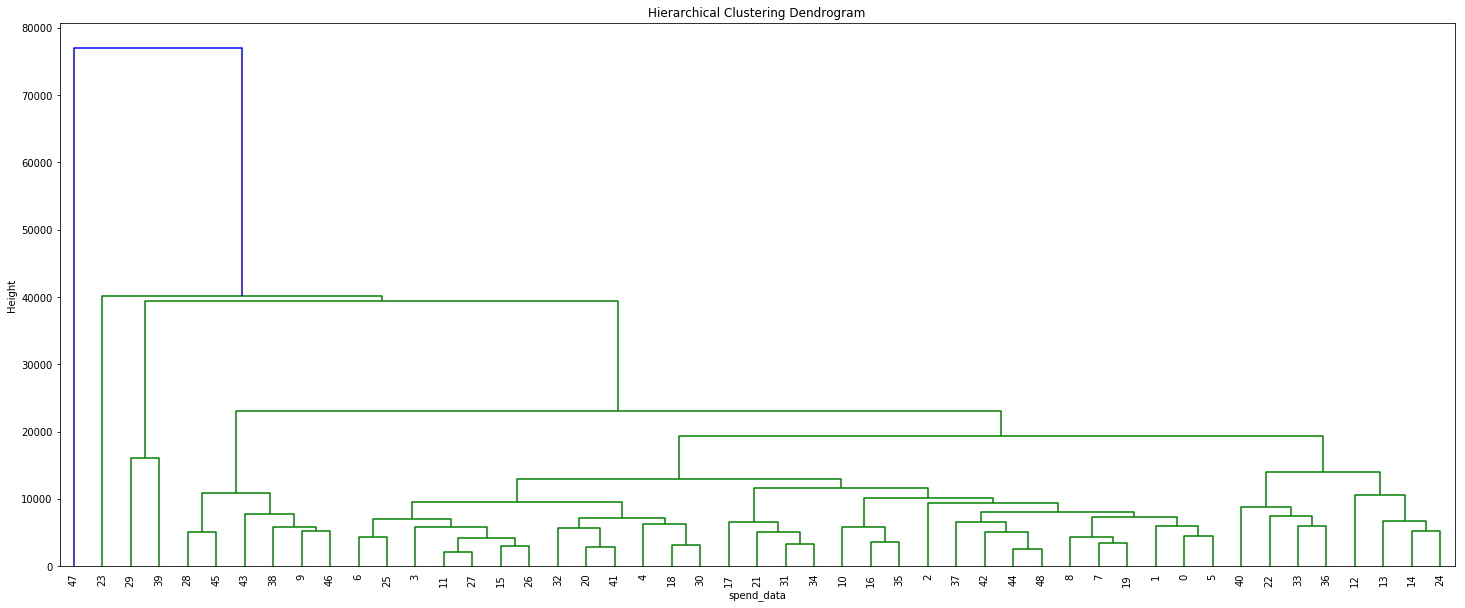

<Figure size 1800x720 with 0 Axes>

   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
0       1  12669  9656     7561     214              2674        1338   
1       2   7057  9810     9568    1762              3293        1776   
2       3   6353  8808     7684    2405              3516        7844   
3       4  13265  1196     4221    6404               507        1788   
4       5  22615  5410     7198    3915              1777        5185   

   cut_tree  
0         0  
1         1  
2         1  
3         0  
4         2  
                 Fresh          Milk       Grocery        Frozen  \
cut_tree                                                           
0         13096.400000   3195.600000   5265.000000   1800.600000   
1          6242.117647   5075.647059   7176.764706   1433.588235   
2         22757.333333   3686.666667   4947.000000   4563.666667   
3         20396.000000   9849.000000  14853.000000   1864.000000   
4         24653.000000   9465.000000  12091.000000    294.000000   
7

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 1301043603.9025862, 1301043603.9025862, 0.0],
  [0.0, 48875031.16309975, 48875031.16309975, 0.0],
  [0.0, 114817140.0683661, 114817140.0683661, 48875031.16309975],
  [0.0, 197151368.16772148, 197151368.16772148, 114817140.0683661],
  [0.0, 128469057.23440062, 128469057.23440062, 0.0],
  [0.0, 147402636.49173898, 147402636.49173898, 0.0],
  [128469057.23440062,
   214522350.17688283,
   214522350.17688283,
   147402636.49173898],
  [0.0, 221546478.51340923, 221546478.51340923, 0.0],
  [214522350.17688283,
   316349790.0099619,
   316349790.0099619,
   221546478.51340923],
  [0.0, 32999114.703115232, 32999114.703115232, 0.0],

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 1301043603.9023979, 1301043603.9023979, 0.0],
  [0.0, 221546478.5097404, 221546478.5097404, 0.0],
  [0.0, 128469057.23411055, 128469057.23411055, 0.0],
  [0.0, 265706443.79772457, 265706443.79772457, 128469057.23411055],
  [221546478.5097404,
   291917505.54988825,
   291917505.54988825,
   265706443.79772457],
  [0.0, 135661770.89785162, 135661770.89785162, 0.0],
  [0.0, 142345304.54106072, 142345304.54106072, 0.0],
  [135661770.89785162,
   182491139.54876152,
   182491139.54876152,
   142345304.54106072],
  [0.0, 197356660.68620753, 197356660.68620753, 182491139.54876152],
  [0.0, 172537775.10470137, 172537775.10470137, 0.0],
  [0.0, 205668141.5766434, 205668141.5766434, 172537775.10470137],
  [197356660.68620753,
   338874565.55610764,
   338874565.55610764,
   205668141.5766434],
  [291917505.54988825,
   537123281.4867204,
   5371

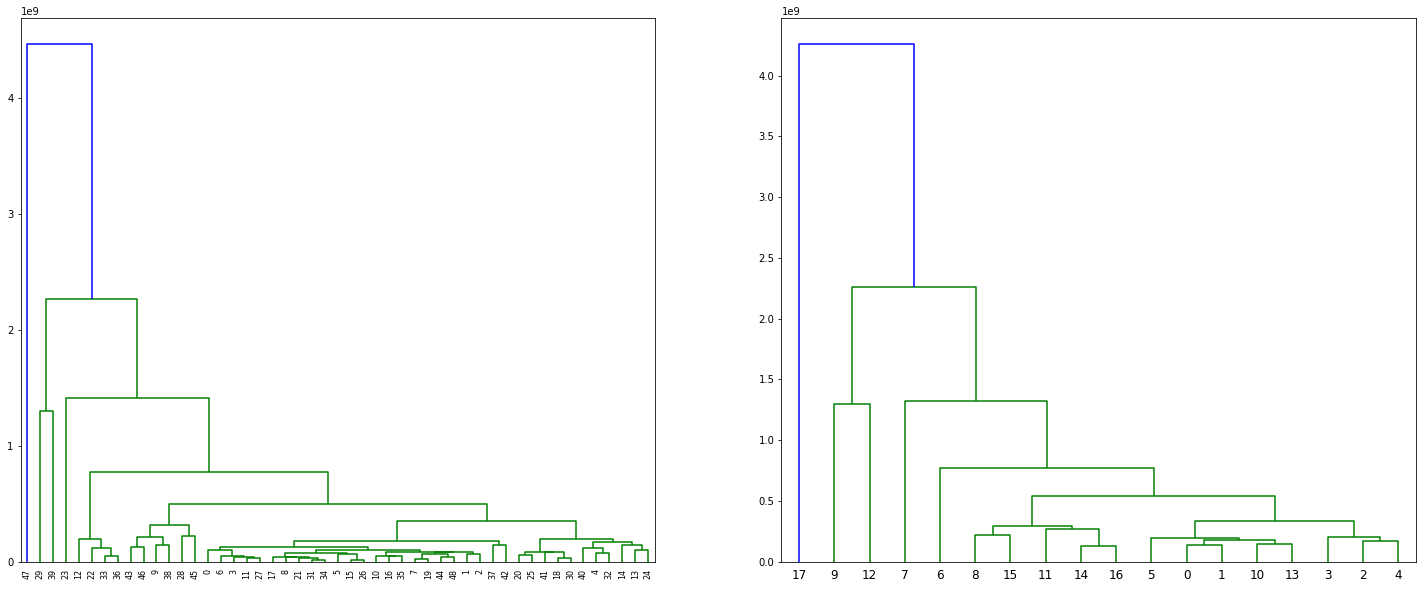

In [117]:
h_c = linkage(spend_data,method="average")
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(h_c, leaf_rotation=90., leaf_font_size=10.)
plt.show()

h_c = linkage(spend_data**2, method="centroid")
plt.figure(figsize=(25, 10))
memb = cut_tree(h_c, n_clusters=20)
memb_temp = [i[0] for i in memb]
spend_data['cut_tree'] = pd.Series(memb_temp)
print(spend_data.head())

sample_data = spend_data.iloc[:, 1:].groupby('cut_tree').mean()
print(sample_data.head(100))

h_c1 = linkage(sample_data**2, method="centroid")
plt.subplot(1, 2, 1)
dendrogram(h_c)
plt.subplot(1, 2, 2)
dendrogram(h_c1)
plt.show()



<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'b'],
 'dcoord': [[0.0, 16087.538717902127, 16087.538717902127, 0.0],
  [0.0, 6424.519515107725, 6424.519515107725, 0.0],
  [0.0, 6000.492979747581, 6000.492979747581, 0.0],
  [0.0, 8007.549604383769, 8007.549604383769, 6000.492979747581],
  [6424.519515107725,
   11611.335665345883,
   11611.335665345883,
   8007.549604383769],
  [0.0, 5219.940229542864, 5219.940229542864, 0.0],
  [0.0, 7217.157519873504, 7217.157519873504, 5219.940229542864],
  [0.0, 12406.321244967556, 12406.321244967556, 7217.157519873504],
  [11611.335665345883,
   23419.110145586466,
   23419.110145586466,
   12406.321244967556],
  [16087.538717902127,
   45380.08845676079,


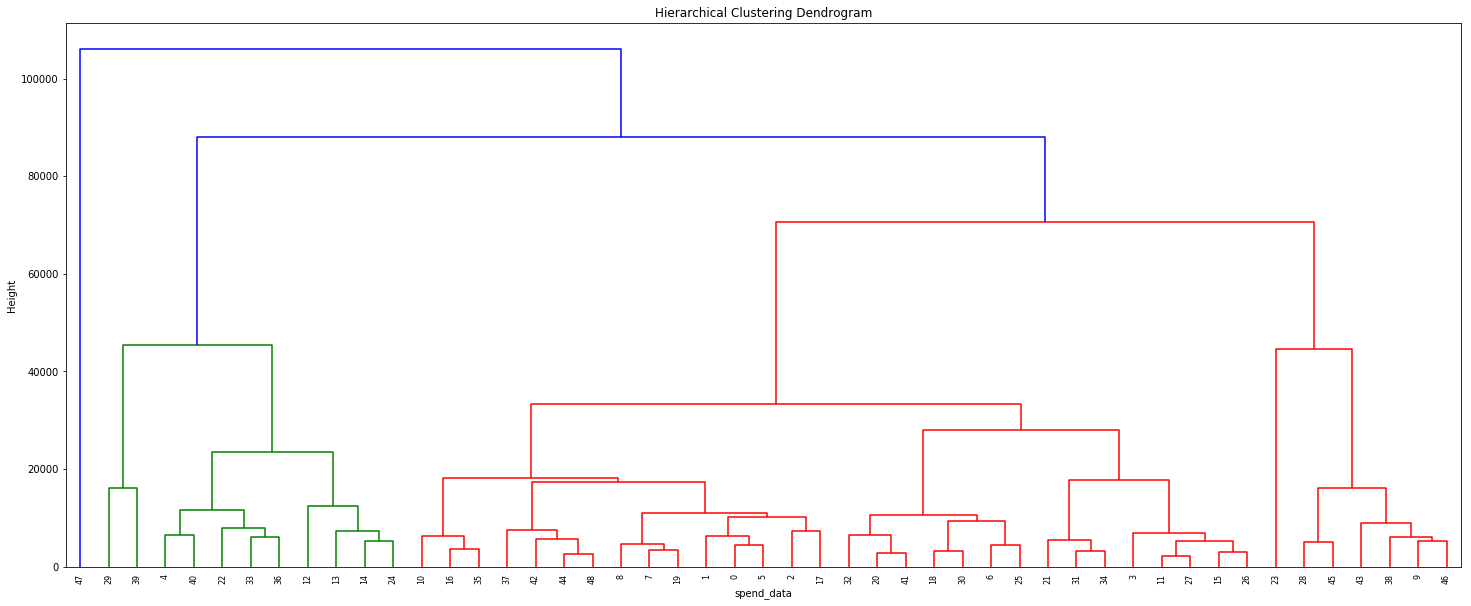

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 5011.6468351231615, 5011.6468351231615, 0.0],
  [0.0, 6000.492979747581, 6000.492979747581, 0.0],
  [0.0, 6646.925981233731, 6646.925981233731, 6000.492979747581],
  [0.0, 5273.721740858158, 5273.721740858158, 0.0],
  [0.0, 5413.501362334732, 5413.501362334732, 5273.721740858158],
  [0.0, 5698.5356013628625, 5698.5356013628625, 5413.501362334732],
  [0.0, 5219.940229542864, 5219.940229542864, 0.0],
  [0.0, 6617.339797834172, 6617.339797834172, 5219.940229542864],
  [0.0, 3633.566842649245, 3633.566842649245, 0.0],
  [0.0, 5308.553381101107, 5308.553381101107, 3633.566842649245],
  [0.0, 4412.721382548416, 4412.721382548416,

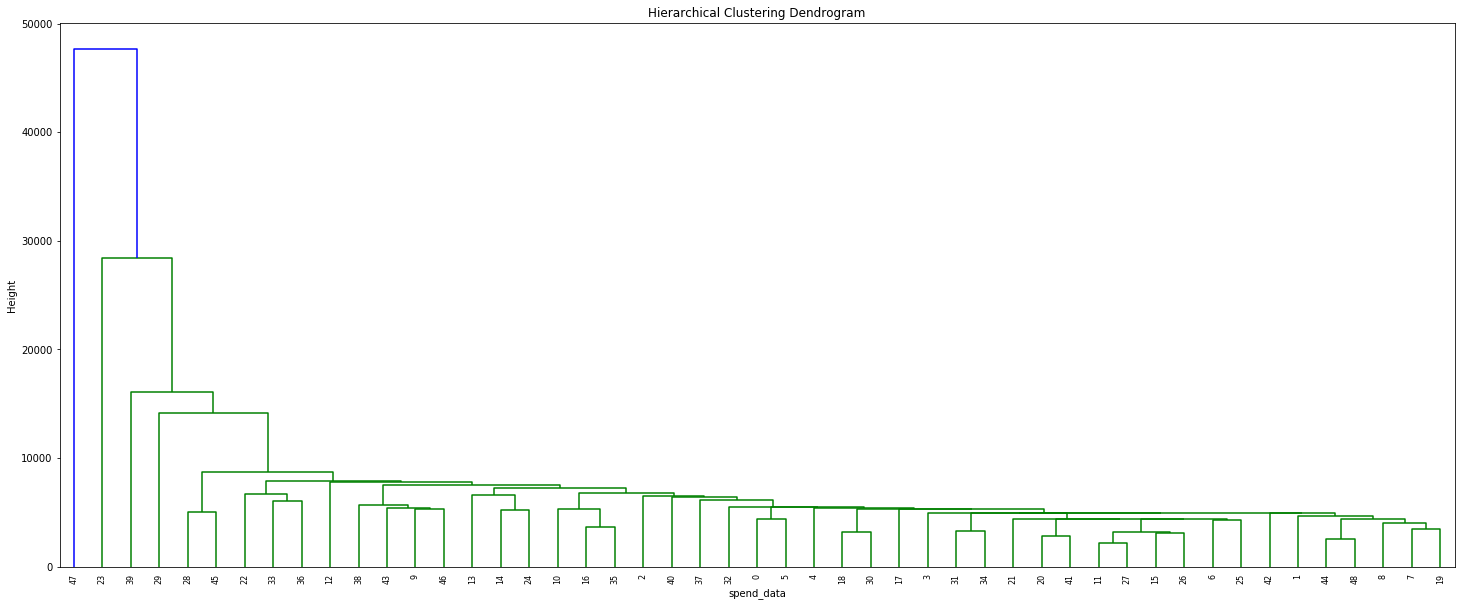

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 16087.538717902127, 16087.538717902127, 0.0],
  [0.0, 6424.519515107725, 6424.519515107725, 0.0],
  [0.0, 6000.492979747581, 6000.492979747581, 0.0],
  [0.0, 8366.756181460052, 8366.756181460052, 6000.492979747581],
  [6424.519515107725,
   11221.579077830356,
   11221.579077830356,
   8366.756181460052],
  [0.0, 5219.940229542864, 5219.940229542864, 0.0],
  [0.0, 6925.730719570319, 6925.730719570319, 5219.940229542864],
  [0.0, 13387.58144699781, 13387.58144699781, 6925.730719570319],
  [11221.579077830356,
   17395.84737803824,
   17395.84737803824,
   13387.58144699781],
  [0.0, 3284.4463764841707, 3284.4463764841707, 0.

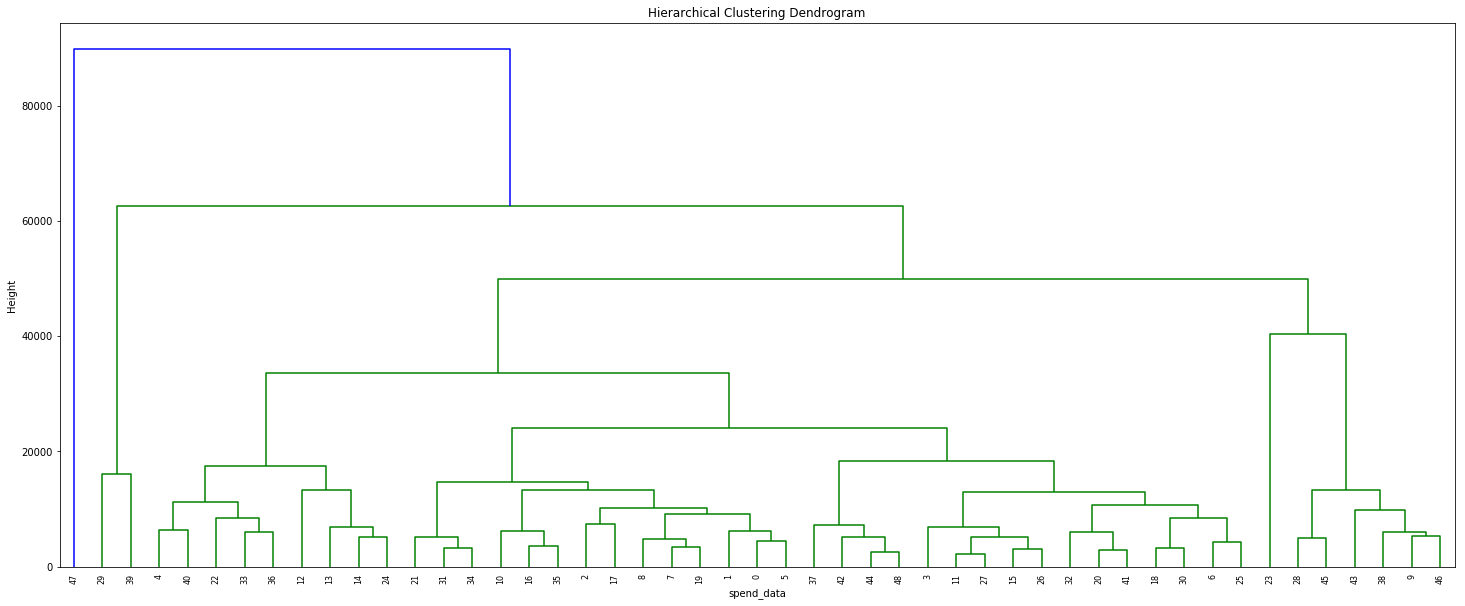

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 16087.538717902127, 16087.538717902127, 0.0],
  [0.0, 5011.6468351231615, 5011.6468351231615, 0.0],
  [0.0, 5273.721740858158, 5273.721740858158, 0.0],
  [0.0, 5858.787322133319, 5858.787322133319, 5273.721740858158],
  [0.0, 7759.3807562571865, 7759.3807562571865, 5858.787322133319],
  [5011.6468351231615,
   10932.325604091879,
   10932.325604091879,
   7759.3807562571865],
  [0.0, 4338.438198246, 4338.438198246, 0.0],
  [0.0, 2154.285960591119, 2154.285960591119, 0.0],
  [0.0, 3058.4630126911784, 3058.4630126911784, 0.0],
  [2154.285960591119,
   4146.924721689503,
   4146.924721689503,
   3058.4630126911784],
  [0.0, 58

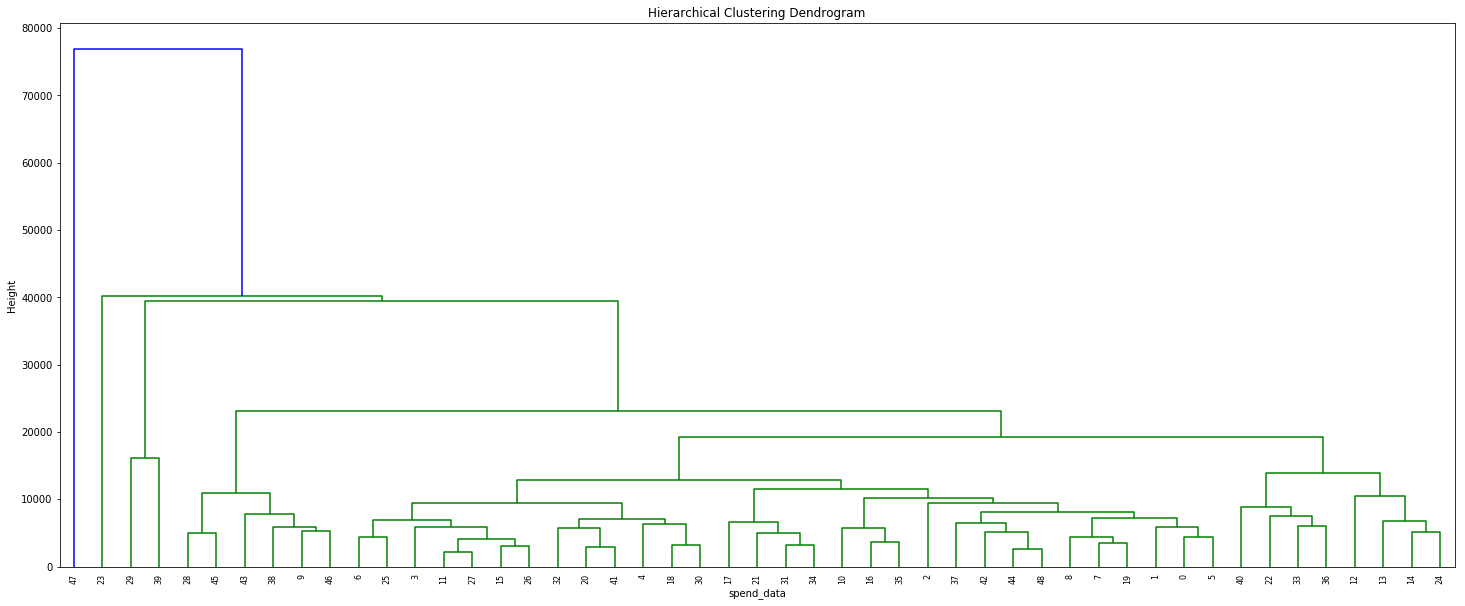

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 16087.538717902127, 16087.538717902127, 0.0],
  [0.0, 6424.519515107725, 6424.519515107725, 0.0],
  [0.0, 6000.492979747581, 6000.492979747581, 0.0],
  [0.0, 6934.741379460376, 6934.741379460376, 6000.492979747581],
  [6424.519515107725, 7686.477623072873, 7686.477623072873, 6934.741379460376],
  [0.0, 2154.285960591119, 2154.285960591119, 0.0],
  [0.0, 3058.4630126911784, 3058.4630126911784, 0.0],
  [2154.285960591119,
   3766.1967553488225,
   3766.1967553488225,
   3058.4630126911784],
  [0.0, 5409.305084759039, 5409.305084759039, 3766.1967553488225],
  [0.0, 3163.7880776057045, 3163.7880776057045, 0.0],
  [0.0, 2845.944

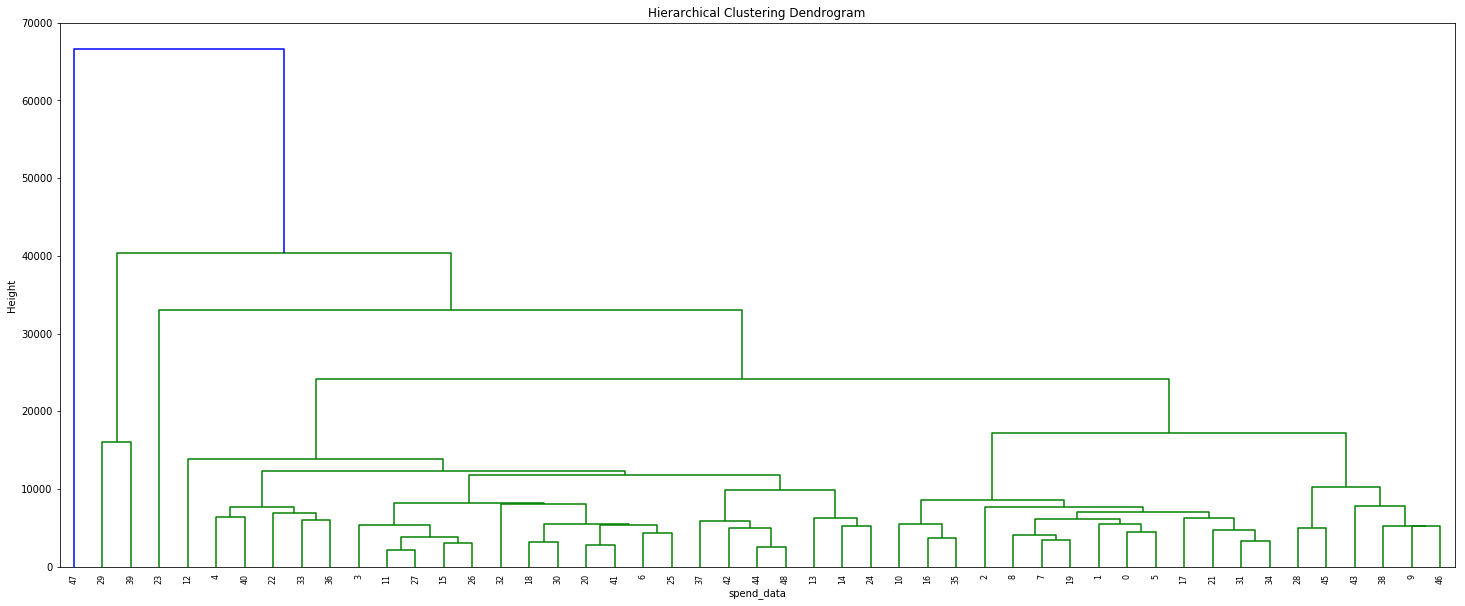

<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'Height')

Text(0.5, 0, 'spend_data')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 16087.538717902127, 16087.538717902127, 0.0],
  [0.0, 5011.6468351231615, 5011.6468351231615, 0.0],
  [0.0, 5273.721740858158, 5273.721740858158, 0.0],
  [0.0, 5234.3131593361895, 5234.3131593361895, 5273.721740858158],
  [0.0, 7268.723829607995, 7268.723829607995, 5234.3131593361895],
  [5011.6468351231615,
   9889.575139382885,
   9889.575139382885,
   7268.723829607995],
  [0.0, 2154.285960591119, 2154.285960591119, 0.0],
  [0.0, 3058.4630126911784, 3058.4630126911784, 0.0],
  [2154.285960591119,
   3766.1967553488225,
   3766.1967553488225,
   3058.4630126911784],
  [0.0, 5409.305084759039, 5409.305084759039, 3766.19675

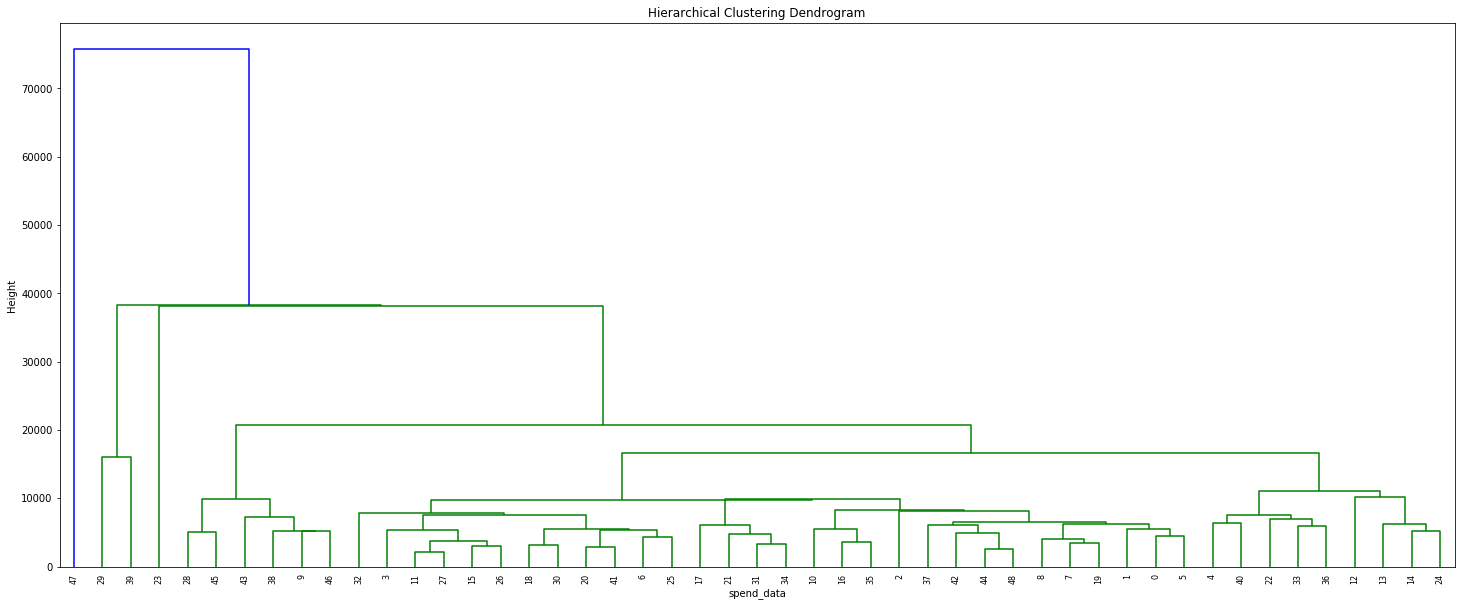

In [118]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c10 = linkage(spend_data,method='ward',metric='euclidean')
dendrogram(h_c10)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c2 = linkage(spend_data,method='single',metric='euclidean')
dendrogram(h_c2)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c3 = linkage(spend_data,method='complete',metric='euclidean')
dendrogram(h_c3)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c4 = linkage(spend_data,method='average',metric='euclidean')
dendrogram(h_c4)
plt.show()

# below method is not exist in the python which is available in R
#h_c5 = linkage(spend_data,method='mcquitty',metric='euclidean')
#dendrogram(h_c5)
#plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c6 = linkage(spend_data,method='median',metric='euclidean')
dendrogram(h_c6)
plt.show()

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
h_c7 = linkage(spend_data,method='centroid',metric='euclidean')
dendrogram(h_c7)
plt.show()